In [24]:
#Import Libraries
import sys
import os
import pandas as pd
from datetime import datetime

In [ ]:
# Add the '../scripts' directory to the Python module search path.
# This allows us to import modules from that directory, 
# facilitating better organization of our code and access to shared scripts.
sys.path.append(os.path.abspath('../scripts'))
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [ ]:
# Import the modules
import data_processing as dp
import model as m
from scripts.data_loader import DataLoader


In [ ]:
# Loads a dataset from a text file and saves it as a CSV file.
dataLoader = DataLoader()
df = dataLoader.load_csv('../data/cleaned/ProcessedMachineLearningRating_v3.csv')

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [28]:

# Encode and scale the data
columns_label = ['sex', 'smoker', 'region']
columns_onehot = ['sex', 'smoker', 'region', 'children']
df_label = dp.encoder('labelEncoder', data, columns_label, columns_onehot)

In [29]:
df_label

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [30]:
columns_scaler = ['charges']
df_scaled = dp.scaler('minMaxScaler', df_label, columns_scaler)
df_scaled

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,0.251611
1,18,1,33.770,1,0,2,0.009636
2,28,1,33.000,3,0,2,0.053115
3,33,1,22.705,0,0,1,0.333010
4,32,1,28.880,0,0,1,0.043816
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0.151299
1334,18,0,31.920,0,0,0,0.017305
1335,18,0,36.850,0,0,2,0.008108
1336,21,0,25.800,0,0,3,0.014144


In [8]:
# Split the data
X = df_scaled.drop('charges', axis=1)
y = df_scaled['charges']
X_train, X_test, y_train, y_test = m.split_data(X, y)


In [31]:
X_train

,age,sex,bmi,children,smoker,region
1114,23,1,24.510,0,0,0
968,21,1,25.745,2,0,0
599,52,0,37.525,2,0,1
170,63,1,41.470,0,0,2
275,47,0,26.600,2,0,0
...,...,...,...,...,...,...
1096,51,0,34.960,2,1,0
1131,27,1,45.900,2,0,3
1295,20,1,22.000,1,0,3
861,38,0,28.000,3,0,3


In [32]:

# Train models
lr_model, dt_model, rfr_model, xgb_model = m.train_models(X_train, y_train)


In [33]:

# Evaluate models
models = ['Linear Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
mae_scores, mse_scores, r2_scores = [], [], []
for model in [lr_model, dt_model, rfr_model, xgb_model]:
    mae, mse, r2, _ = m.evaluate_model(model, X_test, y_test)
    mae_scores.append(mae)
    mse_scores.append(mse)
    r2_scores.append(r2)


# Display the evaluation results for each model
for i, model_name in enumerate(models):
    print(f"Evaluation results for {model_name}:")
    print(f"  - Mean Absolute Error (MAE): {mae_scores[i]}")
    print(f"  - Mean Squared Error (MSE): {mse_scores[i]}")
    print(f"  - R-squared (R2) Score: {r2_scores[i]}")
    print("\n")  # Adds a newline for readability between models


Evaluation results for Linear Regression:
  - Mean Absolute Error (MAE): 0.06675897336664484
  - Mean Squared Error (MSE): 0.009043194261536831
  - R-squared (R2) Score: 0.8068466322629109


Evaluation results for Decision Tree:
  - Mean Absolute Error (MAE): 0.04766572578809052
  - Mean Squared Error (MSE): 0.010701816175810322
  - R-squared (R2) Score: 0.7714201668703586


Evaluation results for Random Forest:
  - Mean Absolute Error (MAE): 0.04111651450625477
  - Mean Squared Error (MSE): 0.005506832289011604
  - R-squared (R2) Score: 0.8823797021910738


Evaluation results for XGBoost:
  - Mean Absolute Error (MAE): 0.04504134370434591
  - Mean Squared Error (MSE): 0.00616446587764255
  - R-squared (R2) Score: 0.8683333222607694




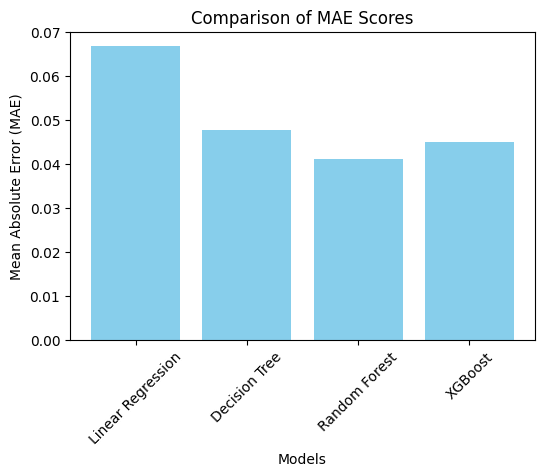

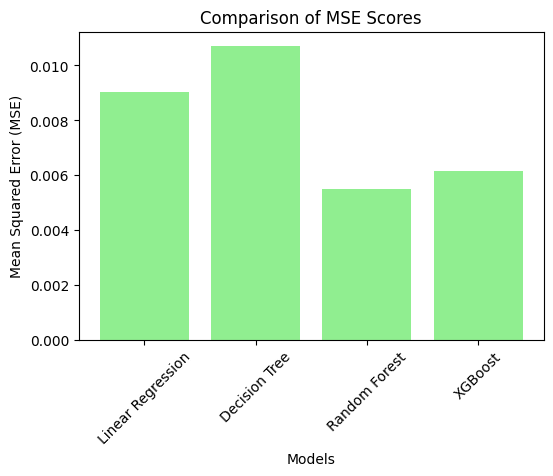

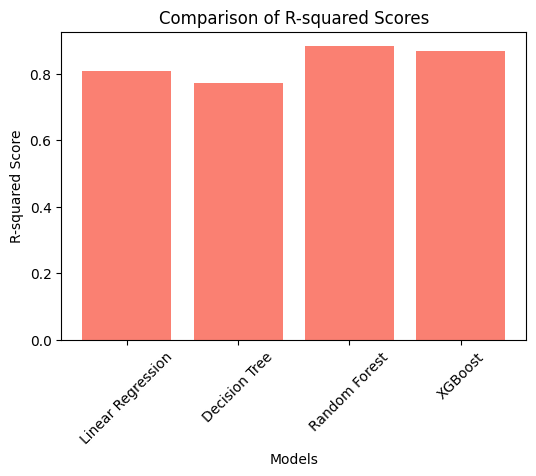

In [12]:
# Plot metrics
m.plot_metrics(models, mae_scores, mse_scores, r2_scores)

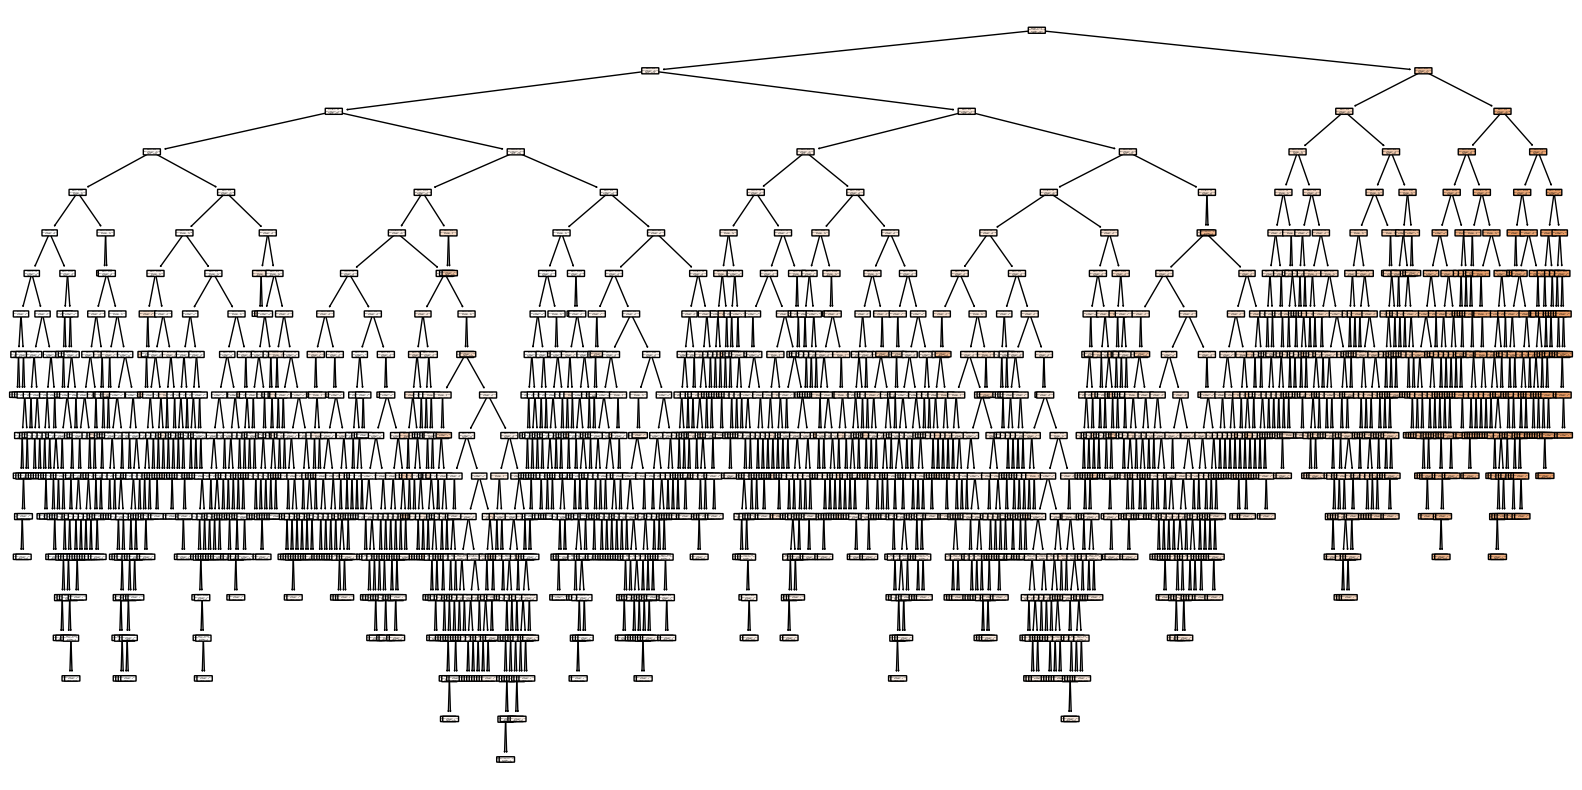

In [13]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
#single_tree = dt_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(decision_tree= dt_model, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

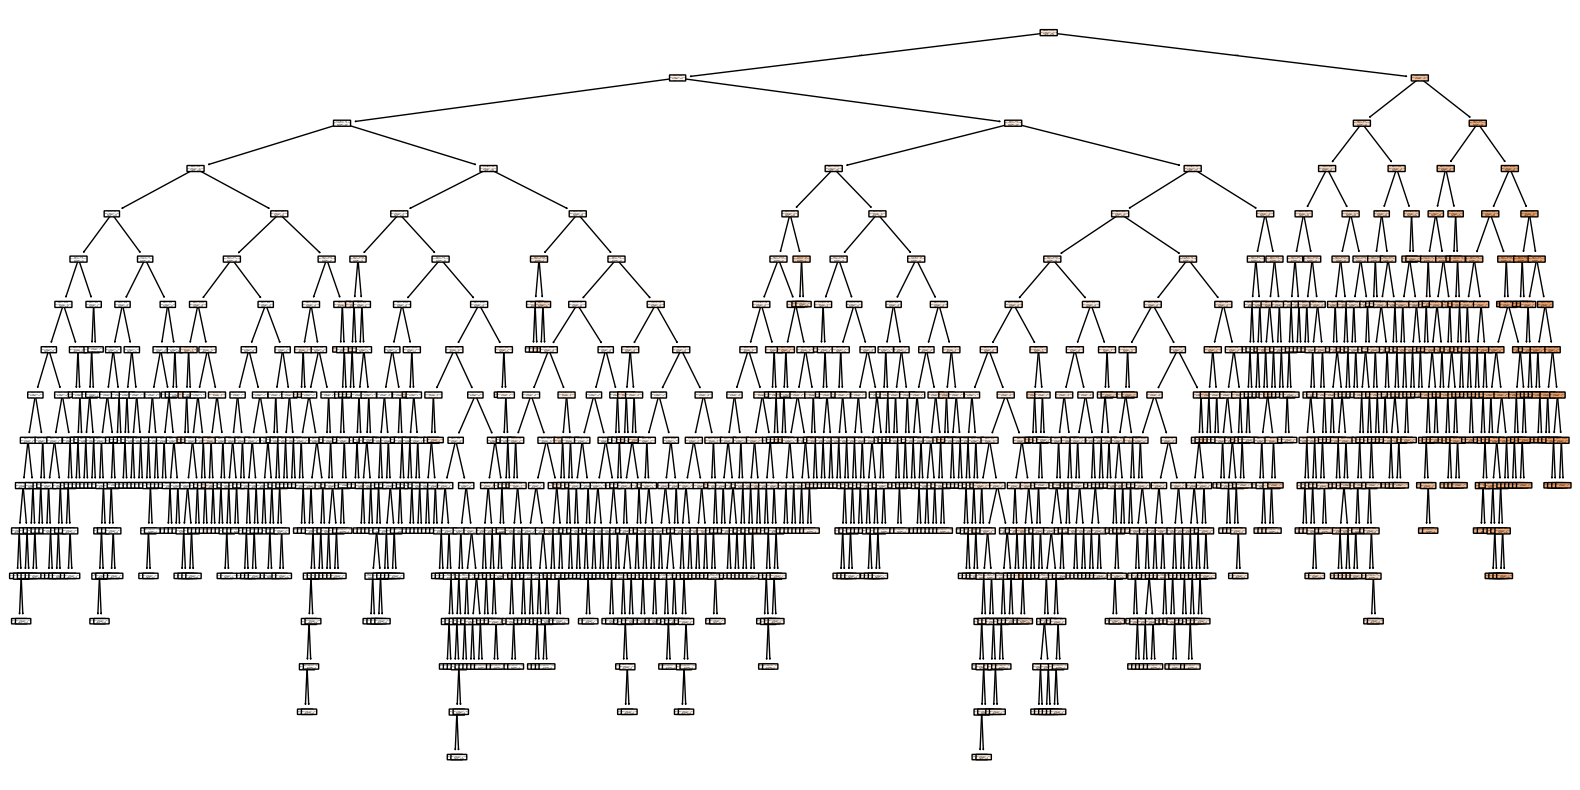

In [14]:

# Extract a single decision tree from the Random Forest
tree_index = 0  # Choose the index of the tree you want to visualize
single_tree = rfr_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.show()

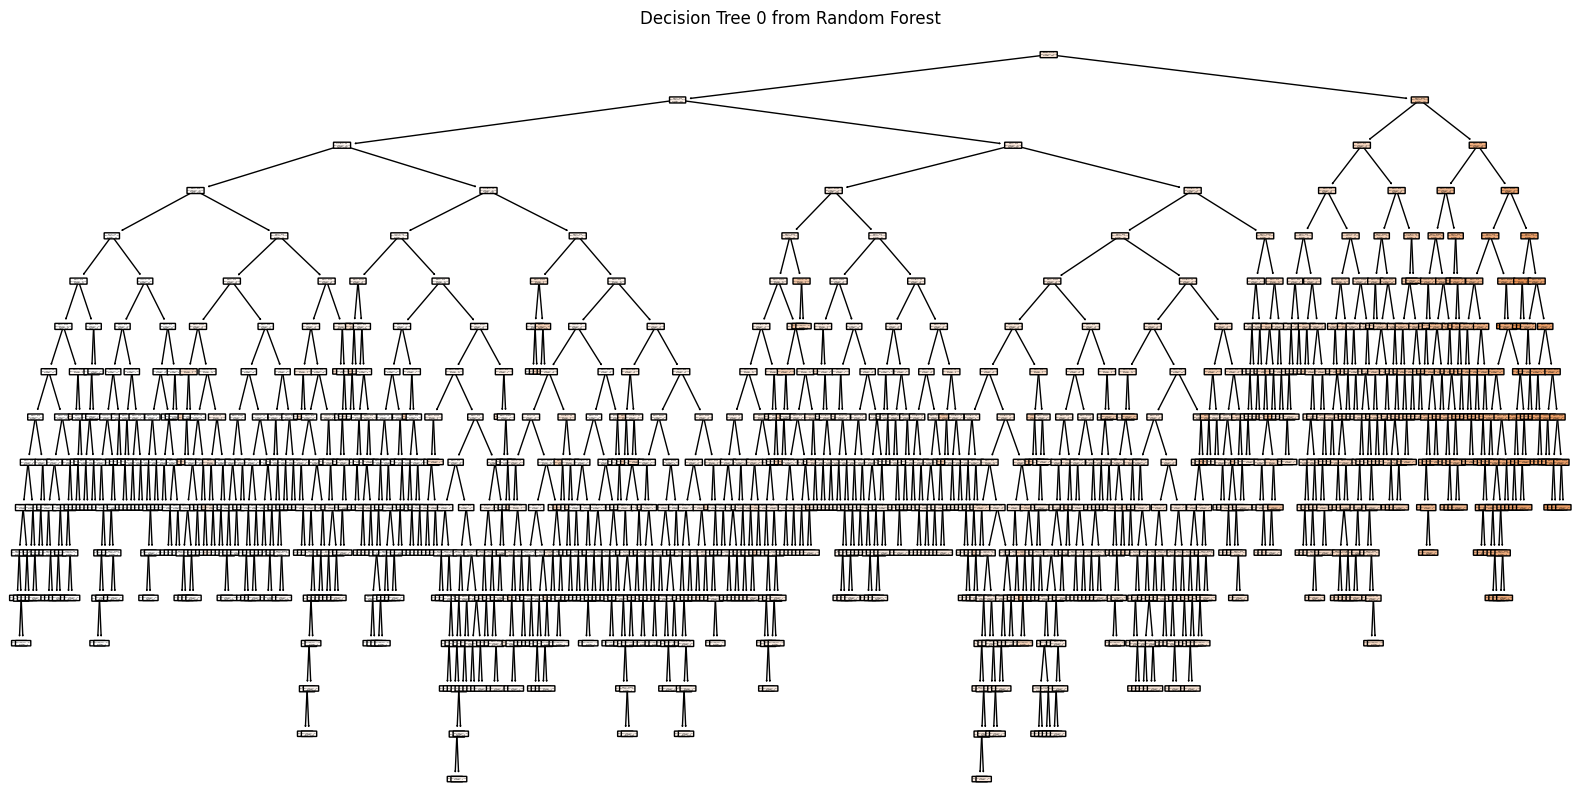

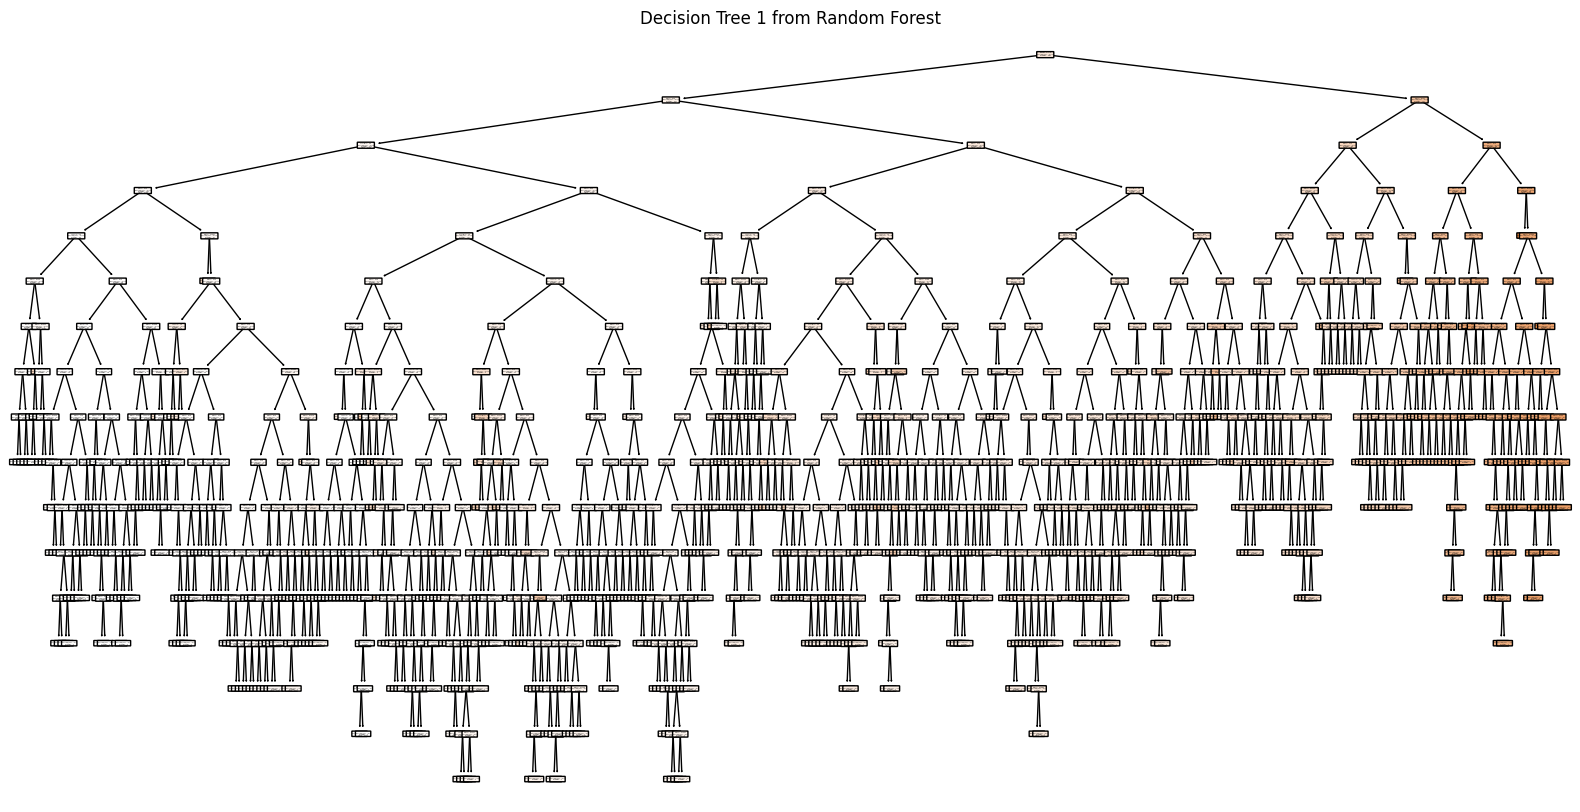

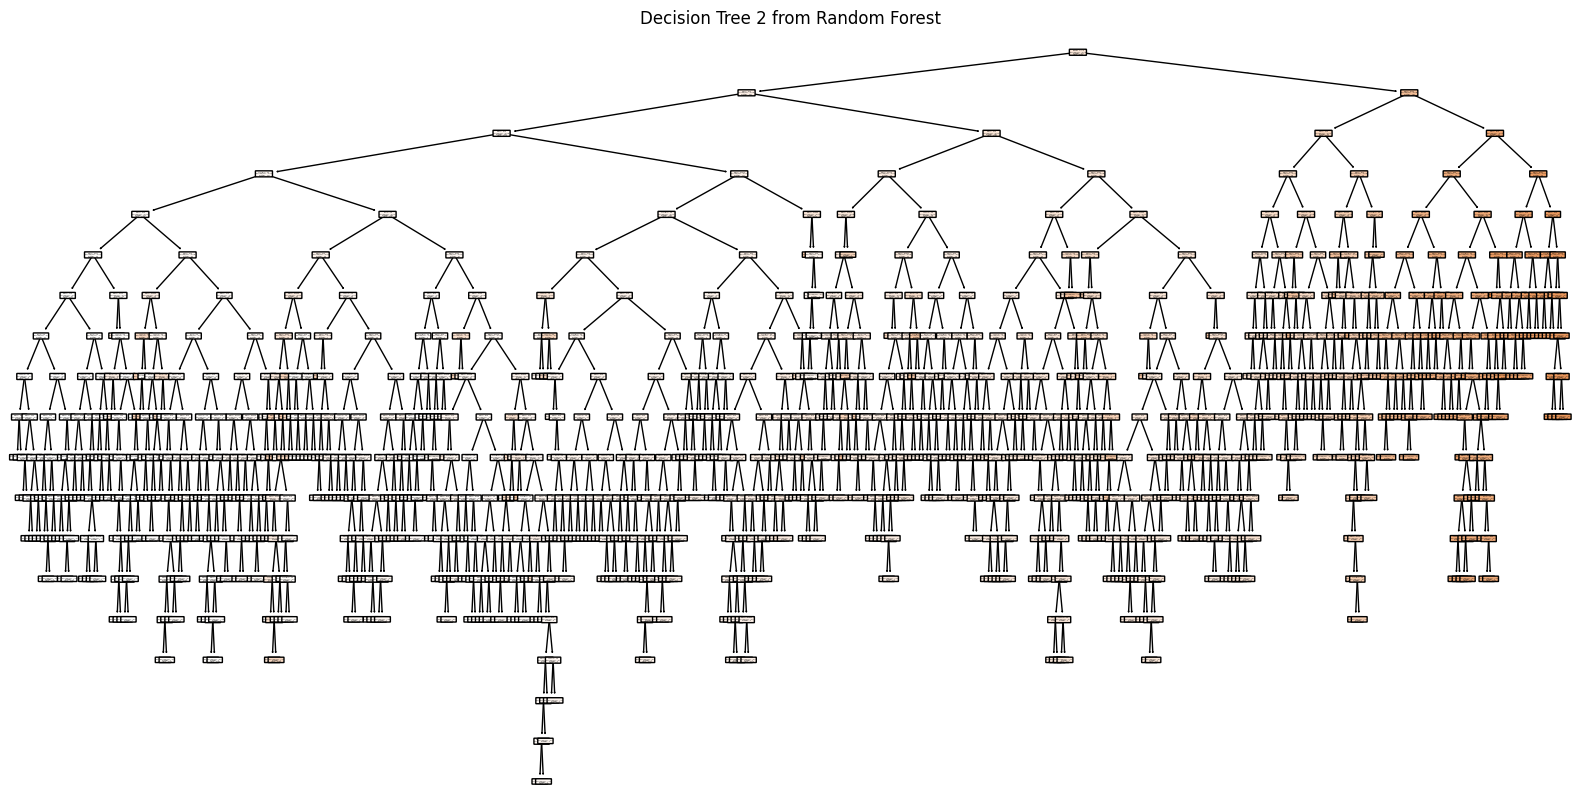

In [15]:
# Plot multiple trees from the Random Forest
for tree_index in range(3):  # Plot the first 3 trees
    single_tree = rfr_model.estimators_[tree_index]
    plt.figure(figsize=(20, 10))
    plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
    plt.title(f"Decision Tree {tree_index} from Random Forest")
    plt.show()


<Figure size 1000x600 with 0 Axes>

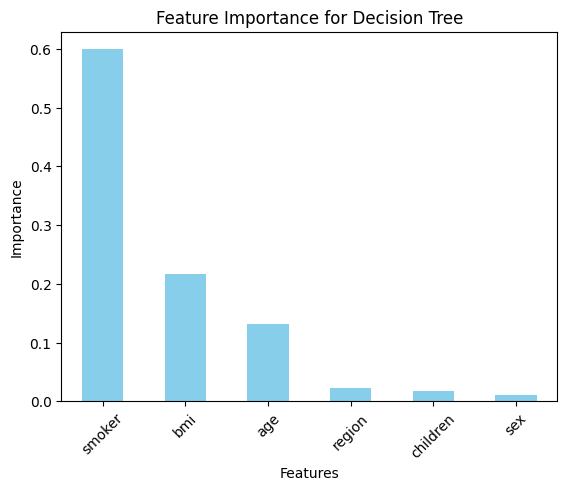

<Figure size 1000x600 with 0 Axes>

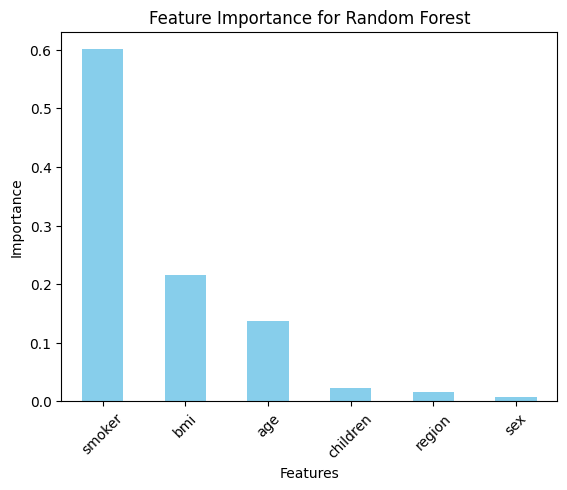

<Figure size 1000x600 with 0 Axes>

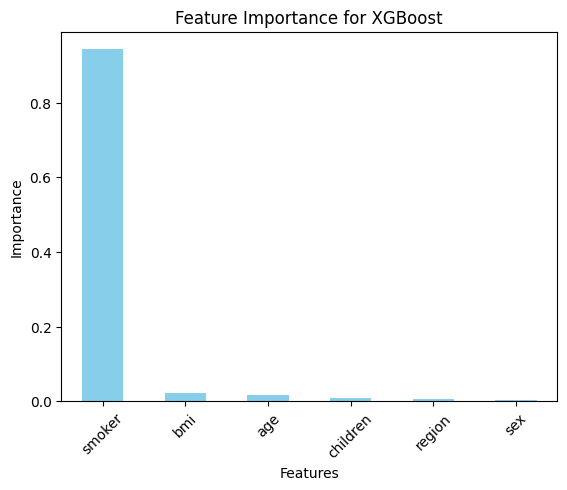

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot feature importance
def plot_feature_importance(model, feature_names, model_name):
    # Get feature importance
    feature_importance = pd.DataFrame(model.feature_importances_, index=feature_names, columns=["Importance"])
    feature_importance = feature_importance.sort_values(by="Importance", ascending=False)

    # Plot the feature importance
    plt.figure(figsize=(10, 6))
    feature_importance.plot(kind='bar', legend=False, color='skyblue')
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.xticks(rotation=45)
    plt.show()

# Call the function for each model
plot_feature_importance(dt_model, X_train.columns, "Decision Tree")
plot_feature_importance(rfr_model, X_train.columns, "Random Forest")
plot_feature_importance(xgb_model, X_train.columns, "XGBoost")


### Hyperparameter tuning for Random forest regression 

In [35]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid for Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],          # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],          # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],          # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],            # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                # Whether bootstrap samples are used when building trees
}

# Initialize the RandomForestRegressor
# rfr_model = RandomForestRegressor(random_state=42)

# Set up the grid search
grid_search = GridSearchCV(estimator=rfr_model, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search model to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and best score
print(f"Best Hyperparameters: {grid_search.best_params_}")
print(f"Best R-squared Score: {grid_search.best_score_}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.5s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   1.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.8s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   2.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   3.9s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.3s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   4.7s
[CV] END bootstrap=True, max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; tot

### Applying the Best Hyperparameters

In [36]:
# Train the model using the best parameters
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

best_rfr_model = grid_search.best_estimator_

# Fit the best model on the training data
best_rfr_model.fit(X_train, y_train)

# Make predictions and evaluate the performance
y_pred_best = best_rfr_model.predict(X_test)
mae_best = mean_absolute_error(y_test, y_pred_best)
mse_best = mean_squared_error(y_test, y_pred_best)
r2_best = r2_score(y_test, y_pred_best)

# Print the results
print(f"MAE: {mae_best}, MSE: {mse_best}, R2: {r2_best}")


MAE: 0.038861938891393236, MSE: 0.004786376584372034, R2: 0.8977678981793442


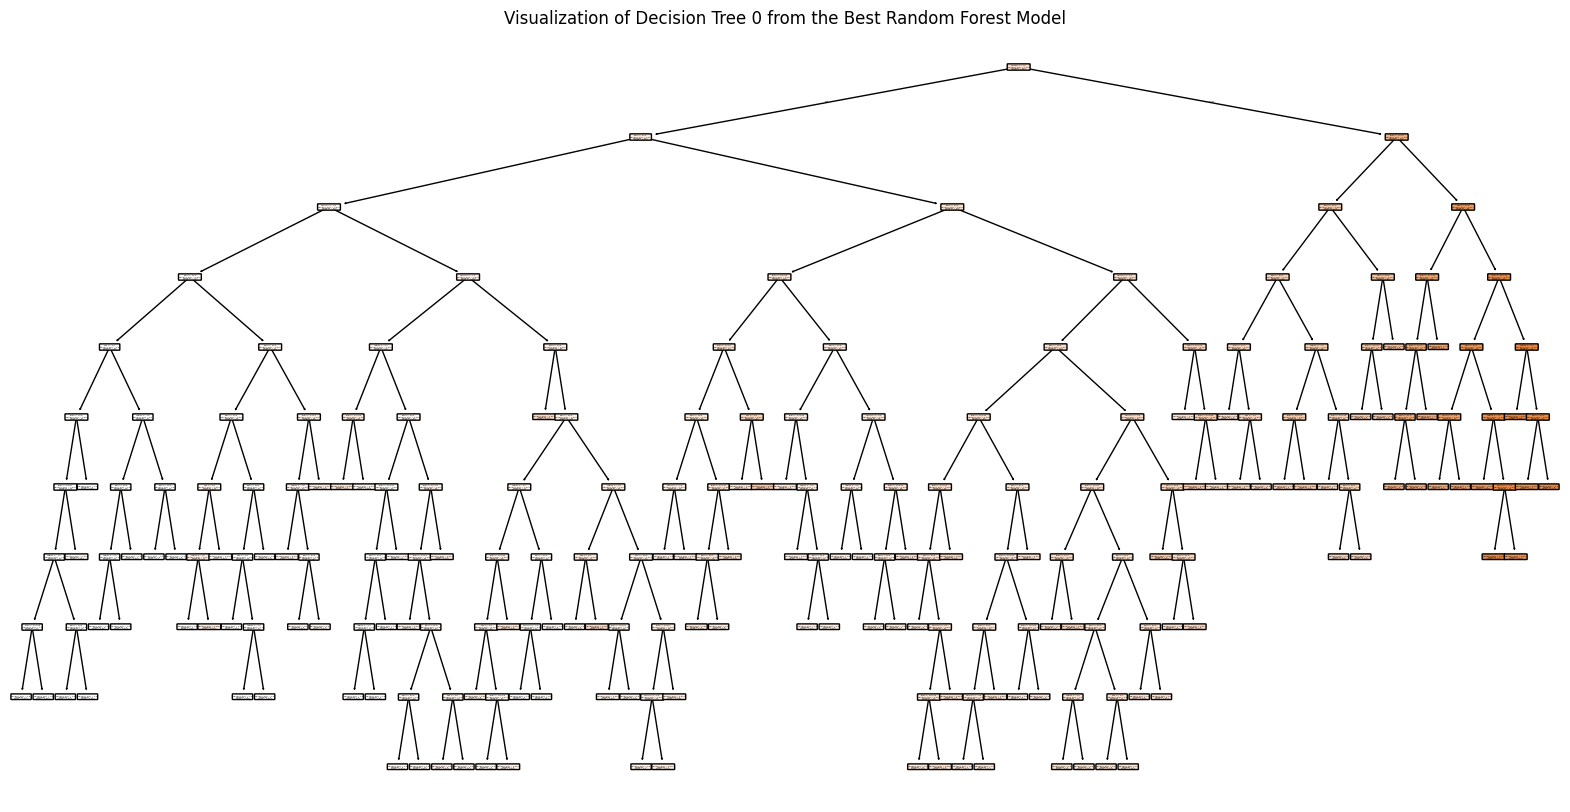

In [22]:
# Extract the best Random Forest model from GridSearchCV
best_rfr_model = grid_search.best_estimator_

# Extract a single decision tree from the Random Forest (you can choose any tree by changing tree_index)
tree_index = 0  # Index of the tree to visualize
single_tree = best_rfr_model.estimators_[tree_index]

# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(single_tree, feature_names=X_train.columns, filled=True, rounded=True)
plt.title(f"Visualization of Decision Tree {tree_index} from the Best Random Forest Model")
plt.show()


In [37]:
from sklearn.tree import _tree

# Extract the best Random Forest model from GridSearchCV
best_rfr_model = grid_search.best_estimator_

# Extract a single decision tree from the Random Forest
tree_index = 0  # Index of the tree to visualize
single_tree = best_rfr_model.estimators_[tree_index]

# Function to display the decision tree criteria
def print_tree_criteria(tree, feature_names):
    # Access the tree structure
    tree_ = tree.tree_
    feature_name = [
        feature_names[i] if i != _tree.TREE_UNDEFINED else "undefined!"
        for i in tree_.feature
    ]
    
    def recurse(node):
        if tree_.feature[node] != _tree.TREE_UNDEFINED:
            name = feature_name[node]
            threshold = tree_.threshold[node]
            print(f"Node {node}: {name} <= {threshold:.2f}")
            recurse(tree_.children_left[node])
            print(f"Node {node}: {name} > {threshold:.2f}")
            recurse(tree_.children_right[node])
        else:
            print(f"Leaf node {node}: Predicted value {tree_.value[node]}")

    recurse(0)  # Start from the root node

# Print the criteria for each split in the selected tree
print_tree_criteria(single_tree, X_train.columns)


Node 0: smoker <= 0.50
Node 1: age <= 42.50
Node 2: children <= 0.50
Node 3: age <= 22.50
Node 4: sex <= 0.50
Node 5: bmi <= 37.80
Node 6: bmi <= 33.59
Node 7: region <= 1.50
Node 8: bmi <= 27.03
Leaf node 9: Predicted value [[0.02295497]]
Node 8: bmi > 27.03
Leaf node 10: Predicted value [[0.01734797]]
Node 7: region > 1.50
Node 11: age <= 19.50
Leaf node 12: Predicted value [[0.00872358]]
Node 11: age > 19.50
Leaf node 13: Predicted value [[0.01240026]]
Node 6: bmi > 33.59
Leaf node 14: Predicted value [[0.05333281]]
Node 5: bmi > 37.80
Leaf node 15: Predicted value [[0.00970866]]
Node 4: sex > 0.50
Node 16: region <= 1.50
Node 17: age <= 20.50
Node 18: region <= 0.50
Leaf node 19: Predicted value [[0.0096418]]
Node 18: region > 0.50
Leaf node 20: Predicted value [[0.00837147]]
Node 17: age > 20.50
Leaf node 21: Predicted value [[0.0153035]]
Node 16: region > 1.50
Node 22: age <= 18.50
Leaf node 23: Predicted value [[0.00035904]]
Node 22: age > 18.50
Leaf node 24: Predicted value [[0